### Krishna Gera, Section PD, Roll Number 10, Registration Number 240905282, Week 10 and 11 Case Study

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Heart_monitoring.csv")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0   

In [6]:
attributes = ['Blood Pressure', 'Cholesterol Level', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

print("\nSummary Statistics Before Cleaning:")
print(df[attributes].describe())

print("\nMissing Values Before Cleaning:")
print(df[attributes].isnull().sum())


Summary Statistics Before Cleaning:
       Blood Pressure  Cholesterol Level  Triglyceride Level  \
count     9981.000000        9970.000000         9974.000000   
mean       149.757740         225.425577          250.734409   
std         17.572969          43.575809           87.067226   
min        120.000000         150.000000          100.000000   
25%        134.000000         187.000000          176.000000   
50%        150.000000         226.000000          250.000000   
75%        165.000000         263.000000          326.000000   
max        180.000000         300.000000          400.000000   

       Fasting Blood Sugar    CRP Level  Homocysteine Level  
count          9978.000000  9974.000000         9980.000000  
mean            120.142213     7.472201           12.456271  
std              23.584011     4.340248            4.323426  
min              80.000000     0.003647            5.000236  
25%              99.000000     3.674126            8.723334  
50%           

In [7]:
for col in attributes:
    df[col].fillna(df[col].median(), inplace=True)

print("\nChecking for Noisy Data (Negative Values):")
for col in attributes:
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {negative_count} negative values")
    df.loc[df[col] < 0, col] = df[col].median()


Checking for Noisy Data (Negative Values):
Blood Pressure: 0 negative values
Cholesterol Level: 0 negative values
Triglyceride Level: 0 negative values
Fasting Blood Sugar: 0 negative values
CRP Level: 0 negative values
Homocysteine Level: 0 negative values


/var/folders/48/12_x89cd46b300cm0sb5w8yw0000gn/T/ipykernel_7283/2830663916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
print("\nSummary Statistics After Cleaning:")
print(df[attributes].describe())

print("\nMissing Values After Cleaning:")
print(df[attributes].isnull().sum())


Summary Statistics After Cleaning:
       Blood Pressure  Cholesterol Level  Triglyceride Level  \
count    10000.000000       10000.000000        10000.000000   
mean       149.758200         225.427300          250.732500   
std         17.556268          43.510401           86.953962   
min        120.000000         150.000000          100.000000   
25%        134.000000         187.000000          176.000000   
50%        150.000000         226.000000          250.000000   
75%        165.000000         263.000000          326.000000   
max        180.000000         300.000000          400.000000   

       Fasting Blood Sugar     CRP Level  Homocysteine Level  
count         10000.000000  10000.000000        10000.000000  
mean            120.141900      7.472200           12.456177  
std              23.558053      4.334601            4.319100  
min              80.000000      0.003647            5.000236  
25%              99.000000      3.681800            8.729771  
50%      

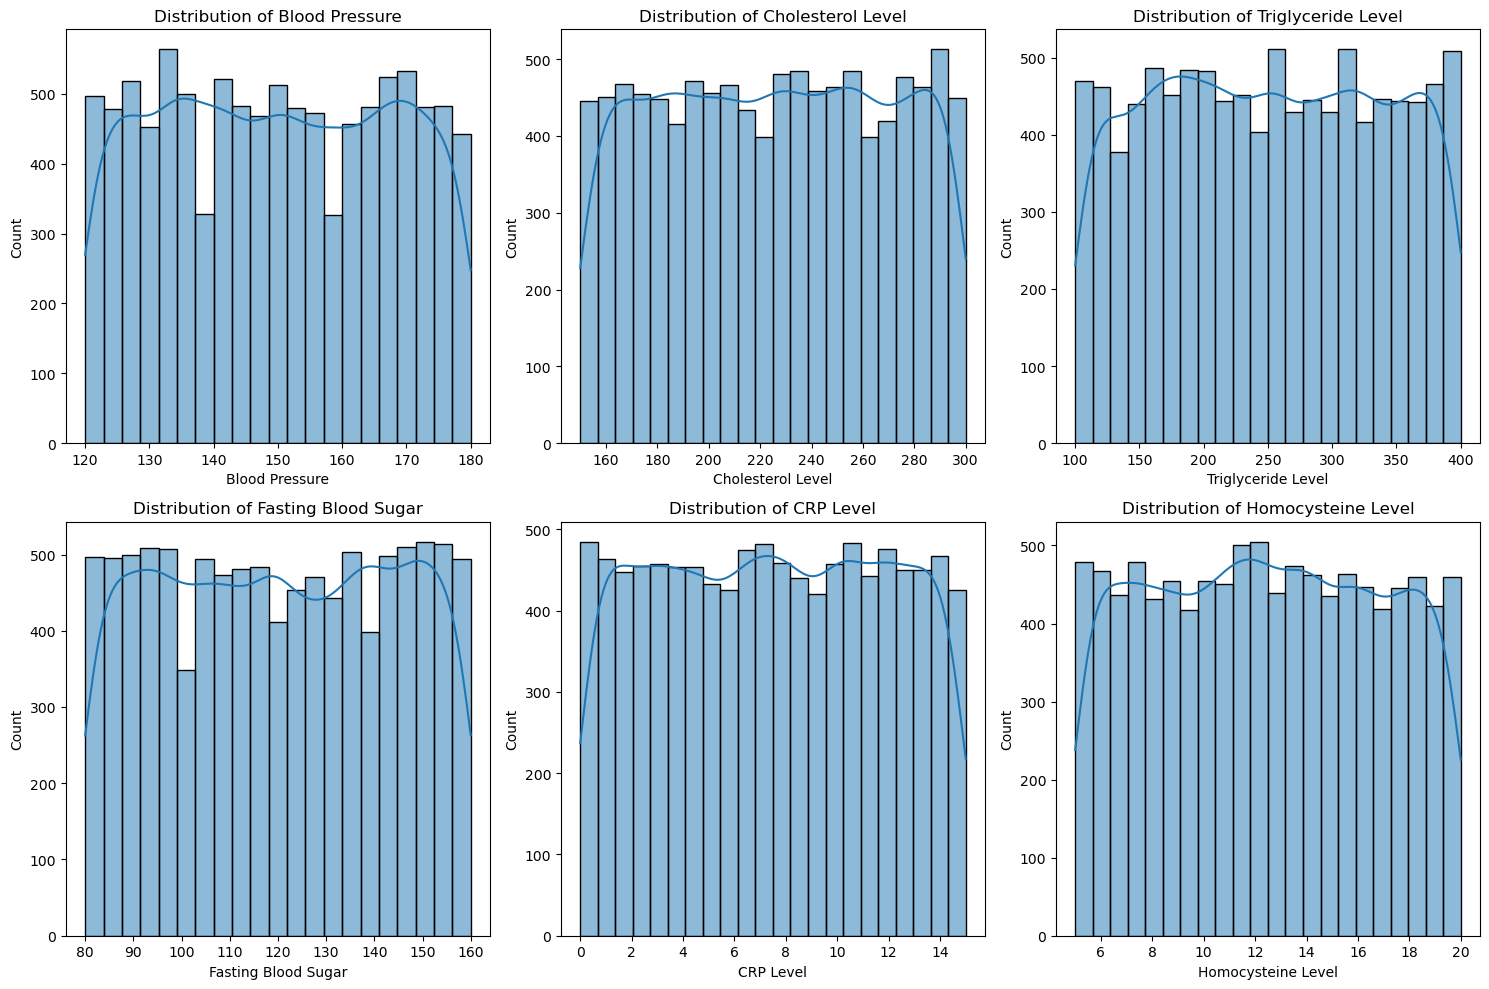

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Displaying outliers using boxplots


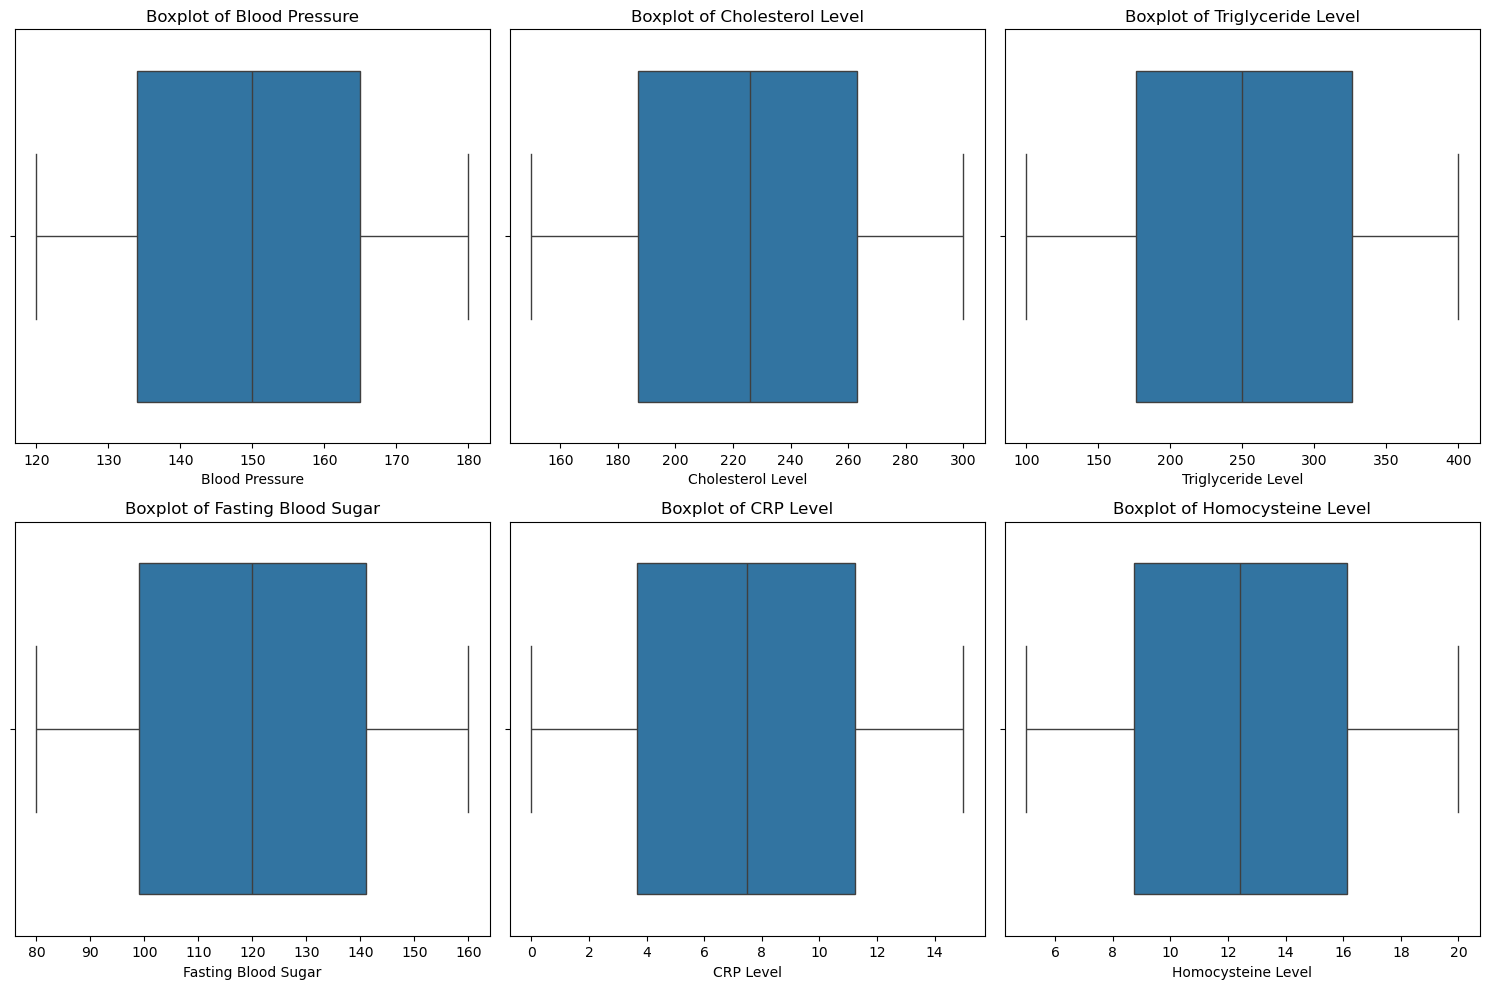

In [11]:
print("Displaying outliers using boxplots")
plt.figure(figsize=(15, 10))
for i, col in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

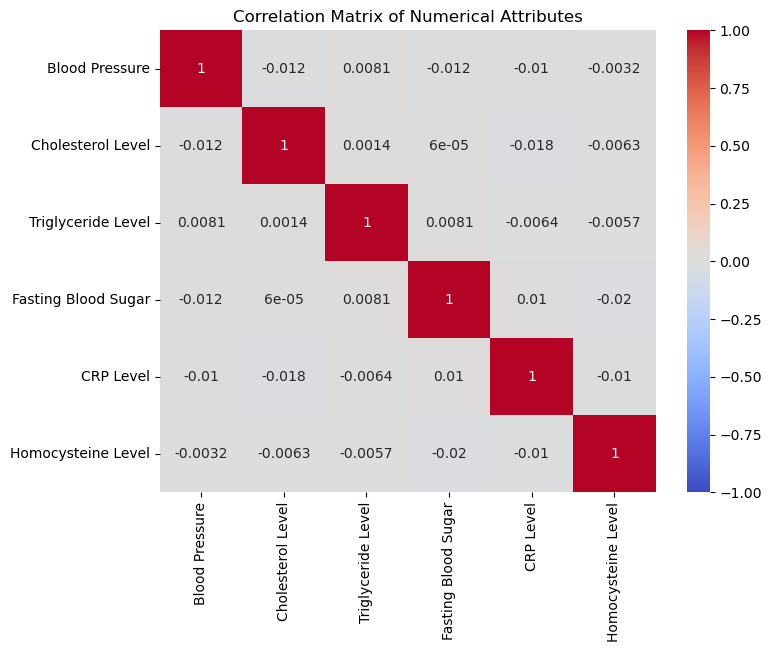

In [12]:
correlation_matrix = df[attributes].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [13]:
df['Heart Disease Status'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})
correlation_with_heart_disease = df[attributes + ['Heart Disease Status']].corr()['Heart Disease Status'].drop('Heart Disease Status')
print("\nCorrelation with Heart Disease Status:")
print(correlation_with_heart_disease)


Correlation with Heart Disease Status:
Blood Pressure        -0.013876
Cholesterol Level      0.002703
Triglyceride Level     0.002904
Fasting Blood Sugar   -0.002248
CRP Level             -0.006009
Homocysteine Level     0.008302
Name: Heart Disease Status, dtype: float64


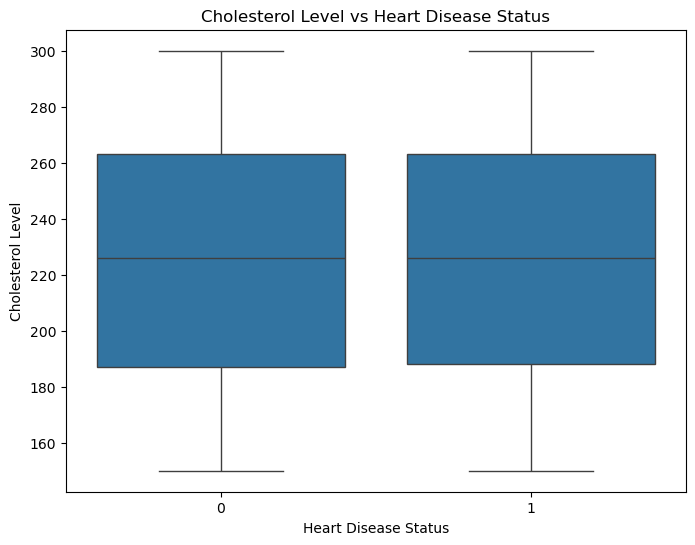

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease Status', y='Cholesterol Level', data=df)
plt.title('Cholesterol Level vs Heart Disease Status')
plt.show()


Proportion of Heart Disease by Smoking Status:
Heart Disease Status         0         1
Smoking                                 
No                    0.801113  0.198887
Yes                   0.799141  0.200859


<Figure size 800x600 with 0 Axes>

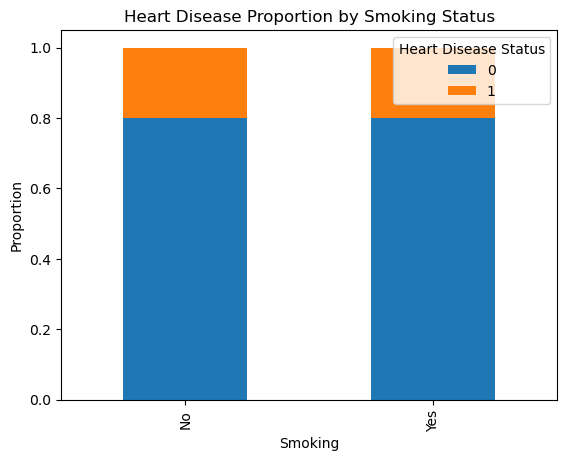

In [16]:
smoking_heart_disease = pd.crosstab(df['Smoking'], df['Heart Disease Status'], normalize='index')
print("\nProportion of Heart Disease by Smoking Status:")
print(smoking_heart_disease)

plt.figure(figsize=(8, 6))
smoking_heart_disease.plot(kind='bar', stacked=True)
plt.title('Heart Disease Proportion by Smoking Status')
plt.ylabel('Proportion')
plt.show()

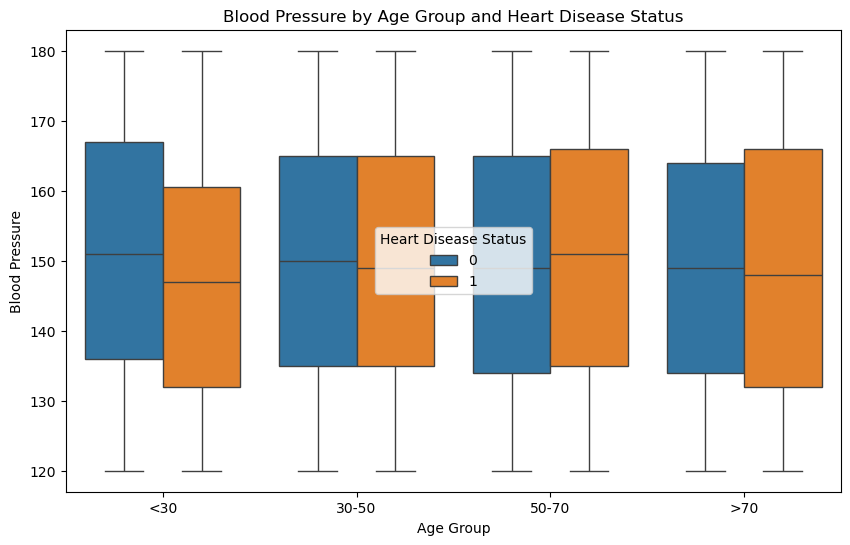

In [17]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '>70'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Blood Pressure', hue='Heart Disease Status', data=df)
plt.title('Blood Pressure by Age Group and Heart Disease Status')
plt.show()